# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 06/04/22 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula F is satisfiable or not. F is represented by a pair (X, C), where X is a set of Boolean variables and C is a set of clauses in Conjunctive Normal Form (CNF). Each clause is a disjunction of literals (a variable or its negation). This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

Recent advances in supervised learning have provided powerful techniques for classifying problems. In this project, we see the SAT problem as a classification problem. Given a Boolean formula (represented by a vector of features), we are asked to predict if it is satisfiable or not.

In this project, we represent SAT problems with a vector of 327 features with general information about the problem, e.g., number of variables, number of clauses, fraction of horn clauses in the problem, etc. There is no need to understand the features to be able to complete the assignment.

The dataset is available at:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_train.csv

This is original unpublished data.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/6d5738101d173b97c565f143f945dedb9c42a400/dm_assignment2/sat_dataset_train.csv?raw=true")
df.head()

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,420,10,42.000000,0.023810,0.600000,0.000000,0.600000,0.600000,0.000000,0.600000,...,78750.0,0.000008,0.0,7.875000e-06,0.000008,2.385082e-21,0.0,2.385082e-21,2.385082e-21,1
1,230,20,11.500000,0.086957,0.137826,0.089281,0.117391,0.160870,2.180946,0.137826,...,6646875.0,17433.722184,1.0,2.981244e-12,34867.444369,1.727721e+04,1.0,1.358551e-53,3.455442e+04,0
2,240,16,15.000000,0.066667,0.300000,0.000000,0.300000,0.300000,0.000000,0.300000,...,500000.0,1525.878932,0.0,1.525879e+03,1525.878932,1.525879e+03,0.0,1.525879e+03,1.525879e+03,1
3,424,30,14.133333,0.070755,0.226415,0.485913,0.056604,0.452830,2.220088,0.226415,...,87500.0,0.000122,1.0,6.535723e-14,0.000245,8.218628e-07,1.0,1.499676e-61,1.643726e-06,0
4,162,19,8.526316,0.117284,0.139701,0.121821,0.111111,0.185185,1.940843,0.139701,...,5859400.0,16591.494310,1.0,6.912726e-42,33182.988621,1.665903e+04,1.0,0.000000e+00,3.331807e+04,1


In [2]:
#check data types
df.dtypes

c                       int64
v                       int64
clauses_vars_ratio    float64
vars_clauses_ratio    float64
vcg_var_mean          float64
                       ...   
rwh_2_mean            float64
rwh_2_coeff           float64
rwh_2_min             float64
rwh_2_max             float64
target                  int64
Length: 328, dtype: object

In [3]:
#check count of the response variable
df['target'].value_counts()

1    976
0    953
Name: target, dtype: int64

In [4]:
#Replace the infinity values with NAN
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [5]:
# check missing values in variables
df.columns[np.isnan(df).any()]

Index(['saps_EstACL_Mean', 'gsat_EstACL_Mean', 'v_nd_p_weights_entropy',
       'v_nd_n_weights_entropy', 'c_nd_p_weights_entropy',
       'c_nd_n_weights_entropy', 'cg_al_node_entropy', 'cg_al_weights_entropy',
       'rg_node_entropy', 'rg_weights_entropy', 'big_node_entropy',
       'big_weights_entropy', 'and_node_entropy', 'and_weights_entropy',
       'band_node_entropy', 'band_weights_entropy', 'exo_node_entropy',
       'exo_weights_entropy'],
      dtype='object')

In [6]:
#Replace NAN values with 0
df2 = df.fillna(0)

In [7]:
#Check for the minimum accuracy that the code should reach.
df2.target

label_total = df2.target.shape[0]

label_1_data = sum(df2.target)
label_0_data = label_total - label_1_data

print("Count of data with label 1:", label_1_data)
print("Count of data with label 0:", label_0_data)

min_accuracy = max(label_1_data,label_0_data)/label_total
print("Minimum accuracy:", min_accuracy*100)

Count of data with label 1: 976
Count of data with label 0: 953
Minimum accuracy: 50.59616381544841


In [8]:
#Assigning Predicting Variables to X and Target Variable Y
features = df2.iloc[:,:-1]
labels = df2.target

*Check the shape of the Features and Labels*

In [9]:
#Split the data into Train and test split
from sklearn import model_selection

# Train - Test Split
train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

print("train_features shape:", train_features.shape)
print("train_labels shape:", train_labels.shape)

print("test_features:", test_features.shape)
print("test_labels:", test_labels.shape)


train_features shape: (1350, 327)
train_labels shape: (1350,)
test_features: (579, 327)
test_labels: (579,)


# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate K-NN and decision tree classifiers using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset. Compare the results of both classifiers.

*KNN using Standard Scaling*

In [10]:
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Train Test Split of 70-30%
train_features_std, test_features_std, train_labels_std, test_labels_std = model_selection.train_test_split(
                                                                                           features, labels, test_size=0.3, random_state=42)

#Pipeline with Standard Scaler and KNN 
pipe_lr_std = Pipeline( [('scl_std', StandardScaler()), ('clf_knn_std',neighbors.KNeighborsClassifier(5))])

#Fit the training data
pipe_lr_std.fit(train_features_std,train_labels_std)

#Accuracy on test data for KNN with standard scaler
print('Test Accuracy knn for min_max:', pipe_lr_std.score(test_features_std, test_labels_std)*100)

Test Accuracy knn for min_max: 92.40069084628671


*KNN using MinMax Scaling*

In [11]:
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Train Test Split of 70-30%
train_features_min_max, test_features_min_max, train_labels_min_max, test_labels_min_max = model_selection.train_test_split(
                                                                                           features, labels, test_size=0.3, random_state=42)

#Pipeline with min_max and KNN
pipe_lr_min_max = Pipeline( [('scl_min_max', MinMaxScaler()), ('clf_knn_min_max',neighbors.KNeighborsClassifier(5))])

#Fit the training data
pipe_lr_min_max.fit(train_features_min_max,train_labels_min_max)

#Accuracy on test data for KNN with min_max scaler
print('Test Accuracy knn for min_max:', pipe_lr_min_max.score(test_features_min_max, test_labels_min_max)*100)

Test Accuracy knn for min_max: 89.81001727115718


*Decision Trees*

In [12]:
from sklearn import tree
from sklearn import metrics

np.random.seed(42)

#Decision Tree model
dtc = tree.DecisionTreeClassifier()

#fit the model
dtc = dtc.fit(train_features, train_labels)

#Accuracy of Decision treeon test data
print('Decision tree Accuracy:',dtc.score(test_features, test_labels)*100)


Decision tree Accuracy: 97.58203799654576


**Results Analysis**

*Accuracy*

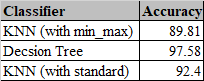

Most of the features in this dataset are between 0 to 1, but it is not ensured that 1 is the max value or 0 is the min value in each feature; hence we perform scaling.

KNN has been scaled using Min Max scaler, and Standard Scaler as the KNN is known to perform better when the features are scaled as KNN uses distance metric in the instantiation, The accuracy of the KNN model with Standard Scalar was more than the model with Min Max scaler. Standardization helps in transforming our data to have zero mean and unit variance. The main advantage of this scaler is that it's not sensitive to outliers as opposed to the Min-Max scaler, which is sensitive to outliers.

We have not scaled for the decision trees because trees are not affected by scaling. After all, the splitting criterion first orders the values of each feature and then calculates the gini\entropy of the split. Some scaling methods keep this order, so there will be no change to the accuracy score.

The Decision tree stood out as the best classifier. First, however, we should perform a CV, hyperparameter tuning to rule out the possibilities of overfitting as the trees are prone to overfitting.

We can see that scaling highly improved the results. We could expect it because it contains features on different scales.





## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods, for instance:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature reduction.
* Feature normalisation.

Your report should provide concrete information of your reasoning; everything should be well-explained.

Do not get stressed if the things you try do not improve the accuracy. The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.

**Feature Reduction**

*Scale the features using Standard Scaler and assign the features to new variables to find out the variability of features*

In [13]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

features_pca = features

scaler = StandardScaler()

scaler.fit(features_pca)

features_scaled_pca =  scaler.transform(features_pca)

*Check if all the 327 explanatory variables are explaining 100 percent variability*

In [14]:
from sklearn.decomposition import PCA

np.random.seed(42)

pca_327 = PCA(n_components = 327, random_state = 42)

pca_327.fit(features_scaled_pca)

feature_pca_327 = pca_327.transform(features_scaled_pca)

print("Variability explained by all 327 principal components = ", sum(pca_327.explained_variance_ratio_*100))

Variability explained by all 327 principal components =  100.00000000000001


*Find the Cumulative sum of the variability explained from the model*

*Plot of the variability VS Number of Features*

Text(0, 0.5, 'explained variance')

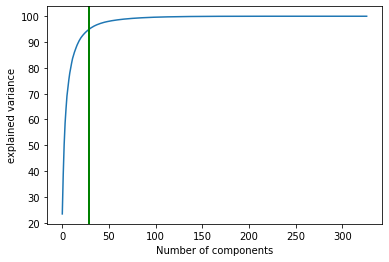

In [37]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_327.explained_variance_ratio_*100))
plt.axvline(linewidth=2, color='g', x=29, ymin=0, ymax=1)
plt.xlabel('Number of components')
plt.ylabel('explained variance')

In [16]:
cumulative_pca = pd.DataFrame(np.cumsum(pca_327.explained_variance_ratio_*100), columns = ['Cumulative Pca Values'])

#Print the component of PCA where the variablity is 95%
print('PCA having variability greater than 95% = ' , cumulative_pca[cumulative_pca['Cumulative Pca Values'] > 95].index.values[0])

print()

#Print the variability Explained by first 29 Principal components
print("Vaiance explained by first 29 principal components =" , np.cumsum(pca_327.explained_variance_ratio_*100)[29])



PCA having variability greater than 95% =  29

Vaiance explained by first 29 principal components = 95.04686943322685


**PCA Component Selection**

Since we have 327 Features, PCA helps summarize the information contained in large data tables through a smaller set of summary indices that can be more easily visualized and analyzed. Overfitting is one of the main problems associated with high dimensionality data which reduces the ability of the model to generalise outside of training set.

Using the plot, we could observe that the variability does not change much between the PC Components after 95%, as observed in the plot given above. We could find that the 29th component has a cumulative variability of 95%, chosen to perform CV to analyze the model performance with PCA.

**KNN and Decision Trees with PCA**

In [47]:
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
np.random.seed(42)

#Train Test Split 70-30%
train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

#Pipeline with PCA for KNN
pipe_lr_knn_pca = Pipeline( [('scl_knn', StandardScaler()), ('pca_knn', PCA(29)),('clf_knn_pca',neighbors.KNeighborsClassifier(5))])

#Pipeline with PCA for Decision Tree
pipe_lr_dt_pca = Pipeline( [('scl_pca', StandardScaler()),('pca_dt', PCA(29)),('clf_dt_pca',tree.DecisionTreeClassifier())])

#Fit KNN Model
pipe_lr_knn_pca.fit(train_features,train_labels)

#Fit Decision Treemodel
pipe_lr_dt_pca.fit(train_features,train_labels)

# Accuracies for KNN and Decision Trees using PCA
print('Test Accuracy for KNN with PCA:', pipe_lr_knn_pca.score(test_features, test_labels)*100)

print()

print('Test Accuracy for Decision trees with PCA:', pipe_lr_dt_pca.score(test_features, test_labels)*100)

Test Accuracy for KNN with PCA: 91.36442141623489

Test Accuracy for Decision trees with PCA: 87.21934369602764


**Results Analysis**

*Accuracy*

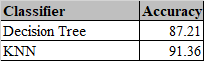

From the above result, we could see that the KNN model performed better with PCA even after the feature reduction but the decision tree accuracy reduced after the implementation of PCA; this might be due to the loss of interpretability of the data after PCA as the decision tree model works best on clear interpretation.


**Hold On CV**

*Train Set Accuracies with PCA and 10 Fold CV*

In [51]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import cross_val_score
np.random.seed(42)

#Pipeline with PCA for KNN
pipe_lr_knn_cv = Pipeline( [('scl_knn', StandardScaler()), ('pca_knn', PCA(29)),('clf_knn_pca',neighbors.KNeighborsClassifier(5))])

#Pipeline with PCA for Decision Tree
pipe_lr_dt_cv_pca = Pipeline( [('pca_dt', PCA(29)),('clf_dt_pca',tree.DecisionTreeClassifier())])

#Pipeline without PCA for KNN
pipe_lr_dt_cv = Pipeline( [('clf_dt_pca',tree.DecisionTreeClassifier())])

#10 fold cross validation for KNN and Decision Tree model
knn_cv_train_result = cross_val_score(pipe_lr_knn_cv, train_features, train_labels,cv=10)
dt_pca_cv_train_result = cross_val_score(pipe_lr_dt_cv_pca, train_features, train_labels,cv=10)
dt_cv_train_result = cross_val_score(pipe_lr_dt_cv, train_features, train_labels,cv=10)


print('KNN Train accuracy for 10fold CV :',knn_cv_train_result.mean()*100)
print()
print('Decision Tree with PCA Train accuracy for 10fold CV :',dt_pca_cv_train_result.mean()*100)
print()
print('Decision Tree without PCA Train accuracy for 10fold CV :',dt_cv_train_result.mean()*100)

KNN Train accuracy for 10fold CV : 89.7037037037037

Decision Tree with PCA Train accuracy for 10fold CV : 84.66666666666667

Decision Tree without PCA Train accuracy for 10fold CV : 97.85185185185185


In [52]:
np.random.seed(42)

#Fit KNN model with PCA and 10 fold CV
pipe_lr_knn_cv.fit(train_features,train_labels)

#Fit Decision Tree model with PCA and 10 fold CV
pipe_lr_dt_cv_pca.fit(train_features,train_labels)

#Fit Decision Tree model without PCA and 10 fold CV
pipe_lr_dt_cv.fit(train_features,train_labels)



# Accuracies for KNN and Decision Trees using PCA
print('Test Accuracy for KNN with 10 Fold CV:', pipe_lr_knn_cv.score(test_features, test_labels)*100)

print()

print('Test Accuracy for Decision trees 10 Fold CV and PCA:', pipe_lr_dt_cv_pca.score(test_features, test_labels)*100)

print()

print('Test Accuracy for Decision trees 10 Fold CV and without PCA:', pipe_lr_dt_cv.score(test_features, test_labels)*100)


Test Accuracy for KNN with 10 Fold CV: 91.36442141623489

Test Accuracy for Decision trees 10 Fold CV and PCA: 86.52849740932642

Test Accuracy for Decision trees 10 Fold CV and without PCA: 97.40932642487047


**Result Analysis**

*Accuracy*

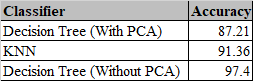

Cross-Validation is a very powerful tool. It helps us better use our data and gives us much more information about our algorithm performance. In complex machine learning models, it’s sometimes easy not to pay enough attention and use the same data in different pipeline steps. This may lead to good but not the real performance in most cases or introduce strange side effects in others. We have to pay attention that we’re confident in our models. Cross-Validation helps us when we’re dealing with non-trivial challenges.

The above models, KNN, Decision tree models were trained by implementing 10-fold Cross-validation methods. We could see the KNN performed well after the cross-validation and PCA. Scaling along with PCA helps to get better performance of the model. It might be due to the outliers in the dataset that shift the PCA eigenvectors. On the other hand, those outliers don’t have such an effect when we do not use PCA.PCA almost always benefits from scaling.

The decision tree  with PCA did not seem to improve, and the Decision Tree with cross-validation outperformed the other two models. It is not always true that PCA, along with CV, helps in better model performance as there might have been a component where 99% of the variance corresponds to the first PC but that PC has no relation to the underlying classes in the data. In contrast, the second PC (which only contributes 1% of the variance) is the one that can separate the classes. If we only keep the first PC, then we lose the feature that provides the ability to classify the data.

To summarize, PCA worked well for KNN, but it did not perform well with Decision Trees.


**HyperParmeter Tuning**

**KNN**

In [20]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


classifierKNN = Pipeline([
    ('scl_knn', StandardScaler()),
    ("pca_knn", PCA()),
    ("predictor", KNeighborsClassifier())])

# Create a dictionary of hyperparameters for the pipeline with the KNN classifier
knn_param_grid = {"pca_knn__n_components": [29, 30, 35, 40, 45],
                  "predictor__n_neighbors": [1,3,5,7,9,11,13,15],
                  "predictor__weights": ['uniform','distance']
                    }

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(classifierKNN, knn_param_grid, scoring="accuracy",cv = 10)

# Run the GridSearchCV
knn_gs.fit(train_features,train_labels)

# Print the best parameters and the score
knn_gs.best_params_, knn_gs.best_score_

({'pca_knn__n_components': 45,
  'predictor__n_neighbors': 11,
  'predictor__weights': 'distance'},
 0.9170370370370371)

In [65]:
from sklearn.metrics import accuracy_score

classifierKNN.set_params(**knn_gs.best_params_) 
classifierKNN.fit(train_features, train_labels)
print('KNN Acuracy with PCA and 10 Fold CV :',accuracy_score(test_labels, classifierKNN.predict(test_features))*100)

KNN Acuracy with PCA and 10 Fold CV : 92.573402417962


**Decision Trees**

In [22]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


classifierDT = Pipeline([("predictor", tree.DecisionTreeClassifier())])

# Create a dictionary of hyperparameters for the pipeline with the Decision Tree classifier
DT_param_grid = {"predictor__criterion": ["entropy", "gini"],
                 "predictor__max_depth": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
                 "predictor__min_impurity_decrease": [0.01, 0.1, 0.2]
                    }

# Create the grid search object which will find the best hyperparameter values based on validation error
dt_gs = GridSearchCV(classifierDT, DT_param_grid, scoring="accuracy",cv=10)

# Run the GridSearchCV
dt_gs.fit(train_features,train_labels)

# Print the best parameters and the score
dt_gs.best_params_, dt_gs.best_score_

({'predictor__criterion': 'entropy',
  'predictor__max_depth': 6,
  'predictor__min_impurity_decrease': 0.01},
 0.9859259259259259)

In [66]:
from sklearn.metrics import accuracy_score

classifierDT.set_params(**dt_gs.best_params_) 
classifierDT.fit(train_features, train_labels)
print('Decision Tree Accuracy with 10 fold CV :',accuracy_score(test_labels, classifierDT.predict(test_features))*100)

Decision Tree Accuracy with 10 fold CV : 97.92746113989638


**Result Analysis**

*Accuracy*

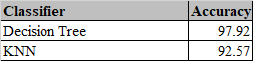

The testing set is used to evaluate the model's performance that have been trained using the training set. While this is a good way to evaluate the model, it might not give a true indication of the model's performance. The data in the testing set may be skewed, and using it to evaluate the model may give a very biased result. A much better way is to divide the entire data set into k-folds (or k-parts, i.e., k-fold means dividing the dataset into 10 equal parts). Out of the k-folds, use 1 fold for testing and k-1 folds for training.

In each iteration, record the metrics (such as accuracy, precision, etc.), and at the end of all the iterations, calculate the mean of these metrics. This gives the model a good mixture of the data for training and testing and gives a better benchmark for the model's performance.

GridSearchCV allows us to specify different values for each hyperparameter and try out all the possible combinations when fitting the model.

**Hyperparameters that are tuned in KNN are:**

*   n_components: Find out the best n_components to perform PCA.
*   n_neighbors: Find the optimal value of K.
*   Weights: Uniform or distance.

n_neighbors are chosen as an odd number. We can choose an even number. In the case of a tie vote, the decision on which class to assign will be made randomly when weights are set to uniform. By choosing an odd number, there will be no ties.

Weights can be set to either uniform, where each neighbor within the boundary carries the same weight, or ‘distance’ where closer points will be more heavily weighted toward the decision.

**Hyperparameters which are tuned in the Decision Tree are:**

*   criterion: Gini or Entropy
*   max_depth: The maximum depth of the tree
*   min_impurity_decrease: A node will be split if this split induces a    decrease of the impurity greater than or equal to this value.

To summarize, We begin with one value for hyperparameters and train the model. We use different hyperparameters to train the model. We continue the method until we have exhausted the various parameter values. Every model produces an error. We pick the hyperparameter that minimizes the error. To pick the hyperparameter, we split our dataset into 3 parts, the training set, validation set, and test set. We tend to train the model for different hyperparameters. We use the error component for each model. We select the hyperparameter that minimizes the error or maximizes the score on the validation set. In ending, test our model performance using the test data.

Decision Tree turned out to be the best model after hyperparameter tuning between KNN and Decision Tree.

## New classifier (10 Marks)

Replicate the previous task for a classifier that we did not cover in class. So different than K-NN and decision trees. Briefly describe your choice.
Try to create the best model for the given dataset.
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently, load all the libraries you need as well.

**Random Forest**

In [61]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

pipe_lr_rf_cv = Pipeline([("RF", RandomForestClassifier())])

pipe_lr_rf_cv_PCA = Pipeline([('scl_knn', StandardScaler()),
    ("pca_knn", PCA()),
    ("RF", RandomForestClassifier())])

#10 fold cross validation for RF Model

RF_cv_train_result = cross_val_score(pipe_lr_rf_cv, train_features, train_labels,cv=10)
RF_cv_train_result_PCA = cross_val_score(pipe_lr_rf_cv_PCA, train_features, train_labels,cv=10)

print('RF Train accuracy for 10fold CV :',RF_cv_train_result_PCA.mean()*100)
print('RF Train accuracy for 10fold CV and PCA:',RF_cv_train_result.mean()*100)


RF Train accuracy for 10fold CV : 92.5925925925926
RF Train accuracy for 10fold CV and PCA: 99.25925925925925


In [63]:
np.random.seed(42)

#Fit Random Forest model with PCA and 10 fold CV
pipe_lr_rf_cv.fit(train_features,train_labels)

#Fit Random Forest model without PCA and 10 fold CV
pipe_lr_rf_cv_PCA.fit(train_features,train_labels)

# Accuracies for Random Forest using PCA and noot using PCA

print('Test Accuracy for Random Forest 10 Fold CV and PCA:', pipe_lr_rf_cv_PCA.score(test_features, test_labels)*100)
print()
print('Test Accuracy for Random Forest with 10 Fold CV:', pipe_lr_rf_cv.score(test_features, test_labels)*100)

Test Accuracy for Random Forest 10 Fold CV and PCA: 93.78238341968913

Test Accuracy for Random Forest with 10 Fold CV: 99.3091537132988


**Result Analysis**

*Accuracy*

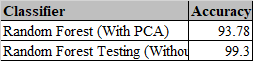

The Random Forest model was built with PCA and without using PCA. Random forest without PCA yielded better results than the Random Forest. Hence the Random Forest without PCA was chosen to do hyperparameter tuning.

In [57]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

classifierRF = Pipeline([
    ("RF", RandomForestClassifier())])

# Create a dictionary of hyperparameters for the pipeline with the RF classifier
RF_param_grid = {"RF__n_estimators":[100,115,130,150,180],
                 "RF__criterion" : ['gini','entropy'],
                 "RF__max_depth":range(2,10,1),
                 "RF__max_features" : ['auto','log2']
                    }

# Create the grid search object which will find the best hyperparameter values based on validation error
rf_gs = GridSearchCV(classifierRF, RF_param_grid, scoring="accuracy",cv=10)

# Run the GridSearchCV
rf_gs.fit(train_features,train_labels)

# Print the best parameters and the score
rf_gs.best_params_, rf_gs.best_score_

({'RF__criterion': 'entropy',
  'RF__max_depth': 8,
  'RF__max_features': 'auto',
  'RF__n_estimators': 100},
 0.9933333333333334)

In [58]:
from sklearn.metrics import accuracy_score

classifierRF.set_params(**rf_gs.best_params_) 
classifierRF.fit(train_features, train_labels)
print('Random Forest test accuracy: ', accuracy_score(test_labels, classifierRF.predict(test_features))*100)

Random Forest test accuracy:  99.48186528497409


**Result Analysis**

*Accuracy*

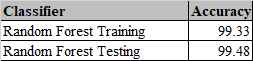

Decision trees are prone to overfitting, especially when a tree is particularly deep. A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are powerful models.
Random Forests reduce variance by training on different samples of the data. A second way is by using a random subset of features.

Random Forest has outperformed both KNN and Decision trees with a prediction accuracy of 99.48%. In addition, random Forest seems to give better predictions of all the models chosen.

Scaling has not been performed since Random Forest is a tree-based algorithm, and tree-based algorithms do not need Scaling. The model is trained with 10-fold cross-validation with the hyperparameter tuning done by grid search CV.

Hyperparameters that are tuned in the Decision Tree are:

*   n_estimators: The number of trees in the forest.
*   criterion: Criterion to measure the quality of the split.
*   max_depth: The maximum depth of the tree.
*   max_features: The number of features to consider when looking for the best split.

On the whole Random Forest demeed to be better performing model than the other implemented model.



**References**


*   https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
*   https://ai.plainenglish.io/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

*   https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6


*   https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf







# <font color="blue">FOR GRADING ONLY</font>

Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset: 
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

In [49]:
import pickle
pickle.dump(classifierRF,  open("best_model_rf_final_4.pkl", "wb" ))

In [56]:
from joblib import dump, load
from io import BytesIO
import requests
import pickle

mLink   = "https://github.com/ManoharGanganna/DM4/blob/main/best_model_rf_final_4.pkl?raw=true"
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)


import pandas as pd
df_test = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv?raw=true")


from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix

xtest = df_test.iloc[:,:-1]
ytest = df_test['target']

import numpy as np
xtest.replace([np.inf, -np.inf], np.nan, inplace=True) 
xtest.fillna(0, inplace=True)


from sklearn.metrics import confusion_matrix,accuracy_score
print("Confusion matrix of the best model:\n",confusion_matrix(model.predict(xtest),ytest))
print("Accurracy of the best model:",accuracy_score(model.predict(xtest),ytest))

Confusion matrix of the best model:
 [[238   4]
 [  0 241]]
Accurracy of the best model: 0.9917184265010351
